# SALES PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/TUSHAR JOSHI/Documents/codsoft/Task- 2/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


We can clearly observe that average expense spend is highest on the TV and lowest on the Radio.

We also observe that maximum sale is 27 whereas the minimum is 1.6.

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
correlation = df.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [9]:
# Defining X and Y variables
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

In [10]:
# train test splitting of the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 4)
X.shape, X_train.shape, X_test.shape

((200, 3), (120, 3), (80, 3))

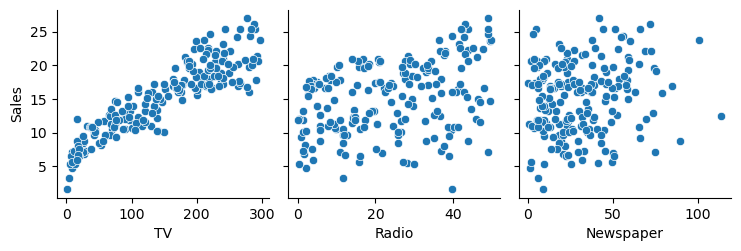

In [11]:
# Pairplot of [TV], [Newspaper], [Radio] Vs [Sales]
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

The plot of Sales Vs TV indicates that with increase in the advertising cost, there is increase in sales as well. 

With the scattered plot of Sales Vs Radio and Sales Vs Newspaper, the observation is slightly unpredictable. 

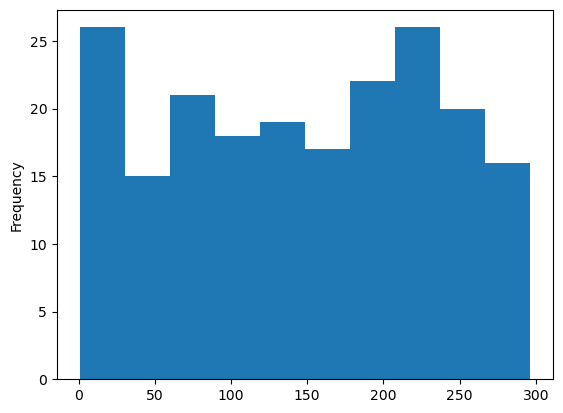

In [12]:
# Histogram plot of TV
df['TV'].plot.hist(bins = 10)
plt.show()

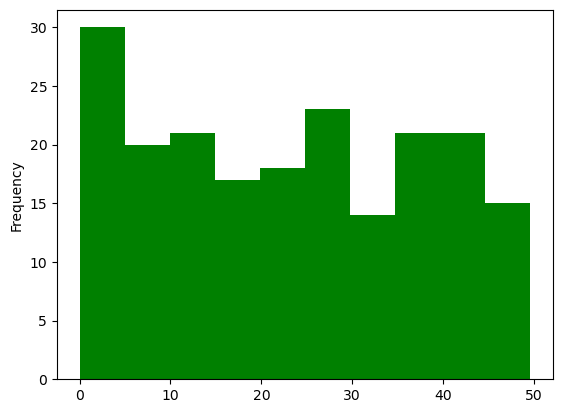

In [13]:
# Histogram plot of Radio
df['Radio'].plot.hist(bins = 10, color='green')
plt.show()

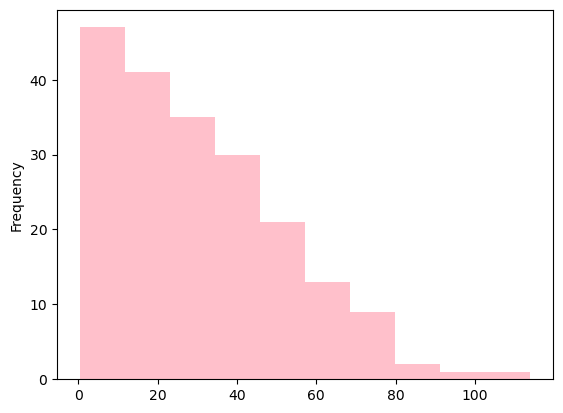

In [14]:
# Histogram plot of Newspaper
df['Newspaper'].plot.hist(bins=10, color='pink')
plt.show()

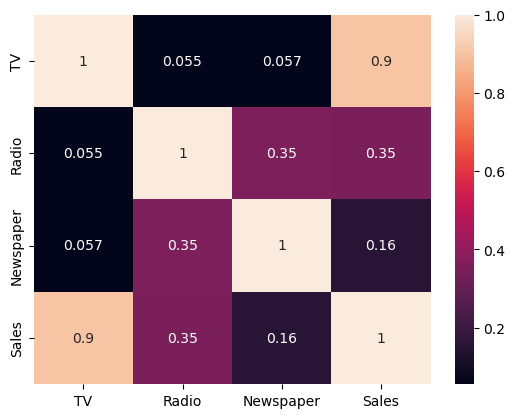

In [15]:
# Plotting the heatmap of the data
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
# Fitting the values
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
# Predicting the values
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [18]:
# Taking mean square error 
m_s_e = mean_squared_error(Y_test, X_test_prediction)
m_s_e

2.3224920139582705

In [19]:
# Taking root mean square error
r_m_s_e = mean_squared_error(Y_test, X_test_prediction, squared = False)
r_m_s_e

1.523972445275265

In [20]:
# Taking r2 score
r2 = r2_score(Y_test, X_test_prediction)
r2

0.9073688571248641

In [21]:
# Using Random Forest Regression
rfr = RandomForestRegressor(random_state = 4)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=4)

In [22]:
rfr_test_predict = rfr.predict(X_test)

In [23]:
rfr_mse = mean_squared_error(Y_test, rfr_test_predict)
rfr_mse

2.0664266374999953

In [24]:
rfr_rmse = mean_squared_error(Y_test, rfr_test_predict, squared = False)
rfr_rmse

1.4375070912868553

In [25]:
rfr_r2 = r2_score(Y_test, rfr_test_predict)
rfr_r2

0.9175818646743094